In [5]:
#import the necessary libraries for the project,such as:seaborn,matplotlib,sklearn,numpy...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [9]:
#read the data,which is csv file and print the first five records
data=pd.read_csv("kc_house_data.csv")


In [10]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
#print the shape of the data
print('We have {} rows and {} columns'.format(data.shape[0],data.shape[1]))

We have 21613 rows and 21 columns


In [8]:
#describe the data,which shows numerical data about our data
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
#show the data information,show the numer of null values in every colum
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

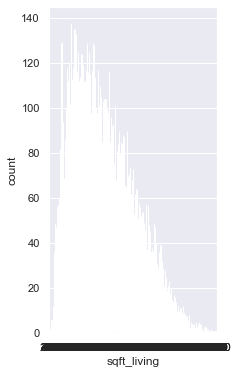

In [13]:
#data visualisation
plt.figure(figsize=(3,6))
sns.countplot(data['sqft_living'])
plt.show()

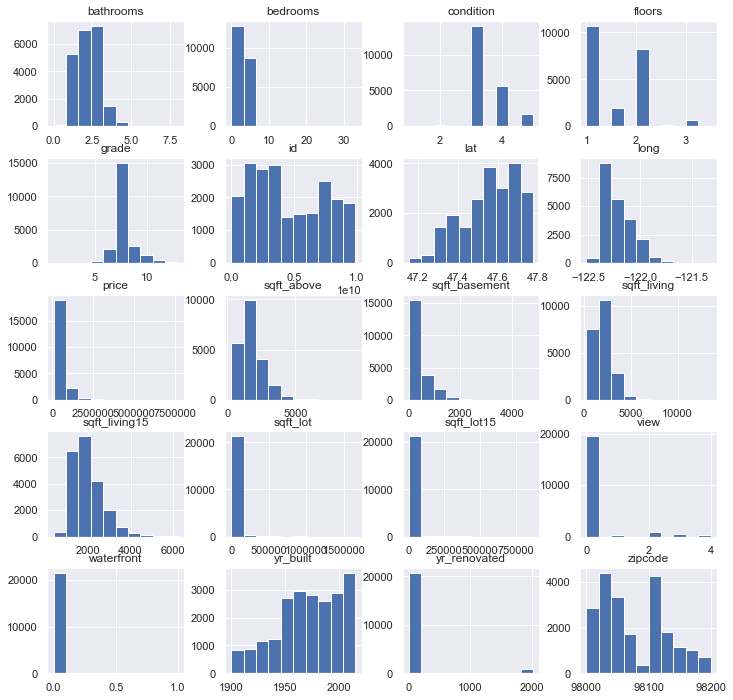

In [14]:
ndata = data.hist(figsize = (12,12))

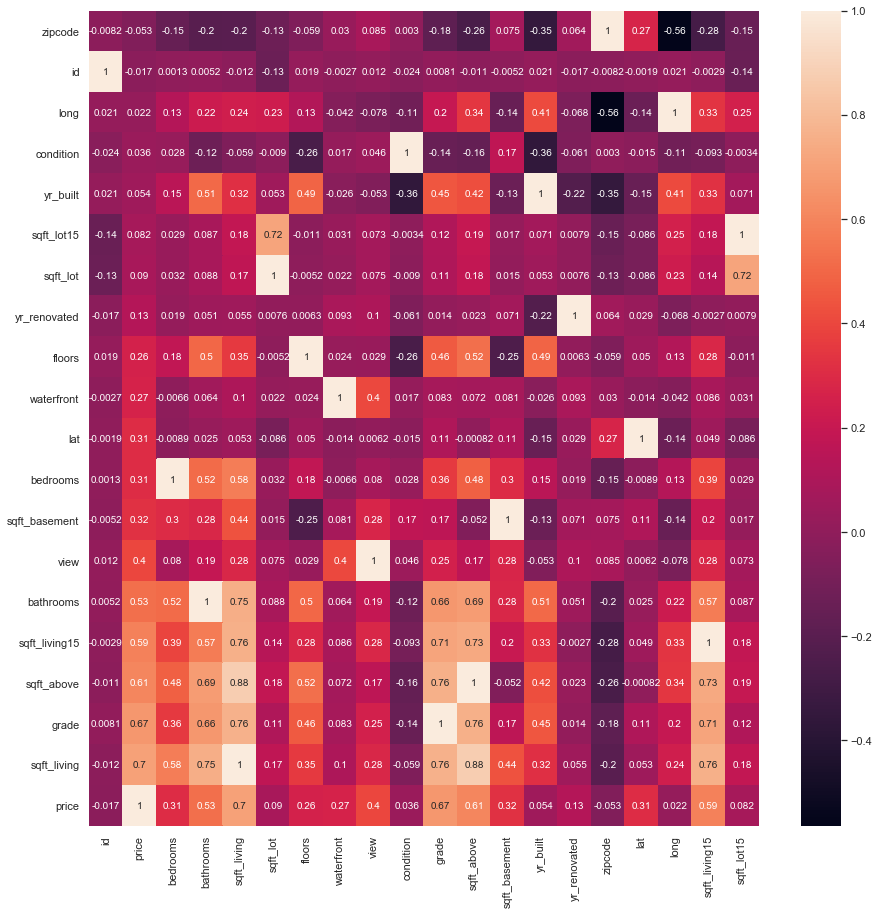

In [17]:
#the feature correlation or "the heatmap"
plt.figure(figsize=(15,15))
sns.heatmap(data.corr().sort_values(by=['price'], ascending=True),annot=True)

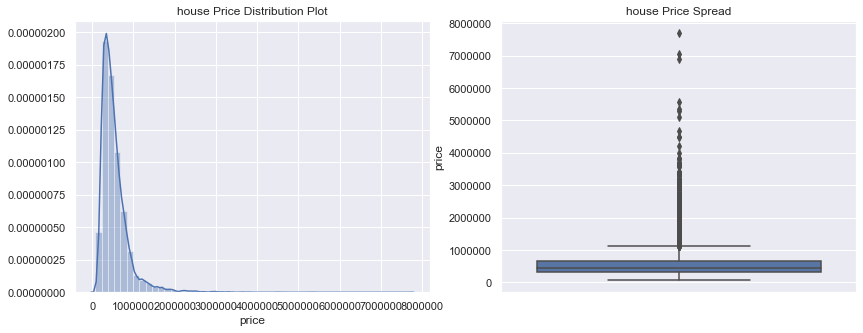

In [19]:
#the concentration of the price

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title('house Price Distribution Plot')
sns.distplot(data.price)
plt.subplot(1,2,2)
plt.title('house Price Spread')
sns.boxplot(y=data.price)
plt.show()



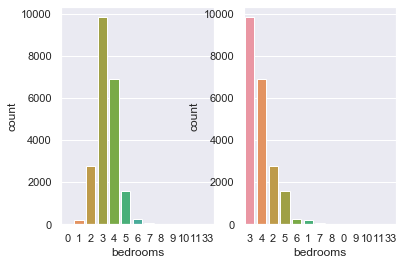

<Figure size 1296x288 with 0 Axes>

In [21]:

#statistics about the number of bedrooms 
f, axes = plt.subplots(1, 2)
plt.figure(figsize=(18,4))
sns.countplot(data['bedrooms'],  orient='v' , ax=axes[0])
sns.countplot(data['bedrooms'], order=data['bedrooms'].value_counts().index,  orient='v' , ax=axes[1])
plt.show()



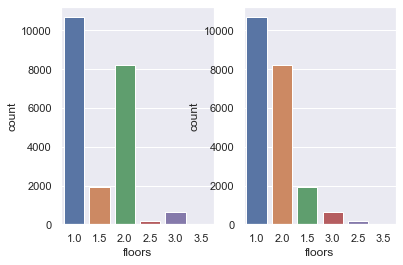

<Figure size 1296x432 with 0 Axes>

In [23]:
#statistics about the number of floors
f, axes = plt.subplots(1, 2)
plt.figure(figsize=(18,6))
sns.countplot(data['floors'],  orient='v' , ax=axes[0])
sns.countplot(data['floors'], order=data['floors'].value_counts().index,  orient='v' , ax=axes[1])
plt.show()

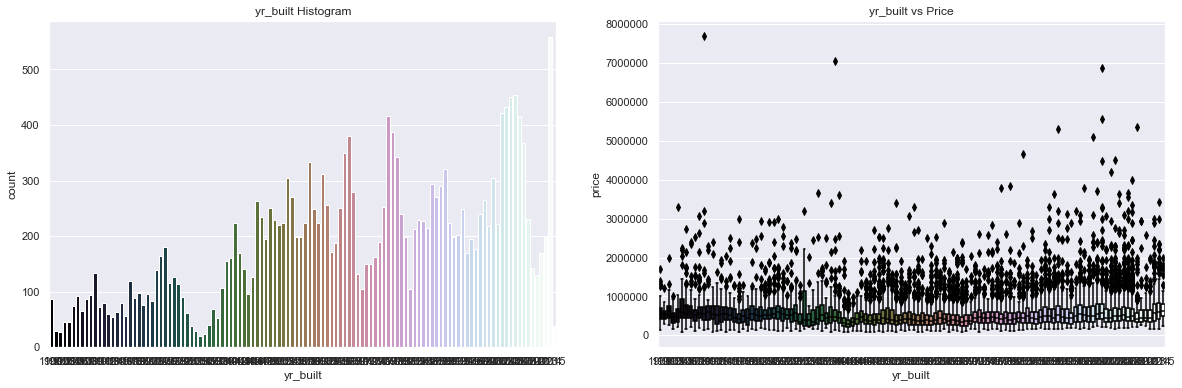

In [24]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('yr_built Histogram')
sns.countplot(data.yr_built, palette=("cubehelix"))
plt.subplot(1,2,2)
plt.title('yr_built vs Price')
sns.boxplot(x=data.yr_built, y=data.price, palette=("cubehelix"))
plt.show()

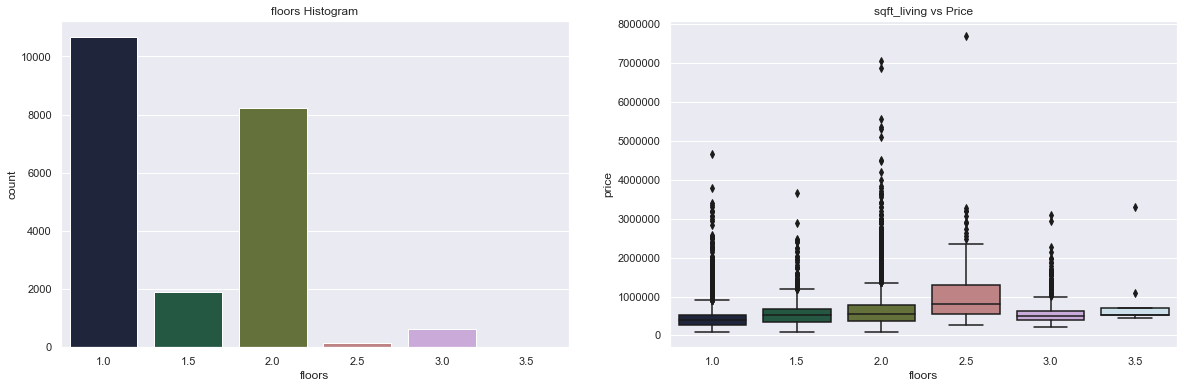

In [26]:
#statistics about the relation between the floors vs. the price
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('floors Histogram')
sns.countplot(data.floors, palette=("cubehelix"))
plt.subplot(1,2,2)
plt.title('sqft_living vs Price')
sns.boxplot(x=data.floors, y=data.price, palette=("cubehelix"))
plt.show()

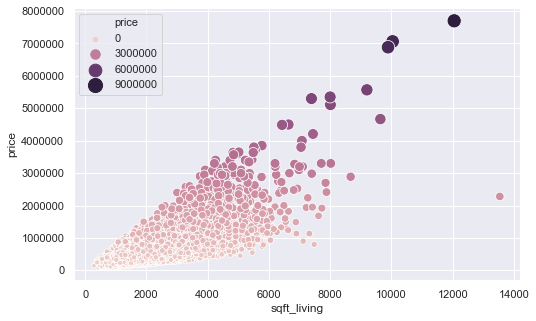

In [28]:

#statistics about the relation between the sqft_living vs. the price
plt.figure(figsize=(8,5))
sns.scatterplot(x='sqft_living',y='price',hue='price',size='price',sizes=(20,200),data=data)
plt.show()



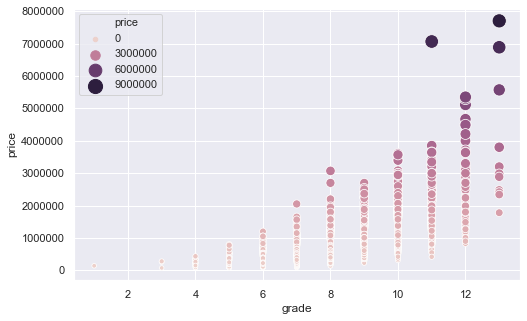

In [30]:
#statistics about the relation between the grade vs. the price
plt.figure(figsize=(8,5))
sns.scatterplot(x='grade',y='price',hue='price',size='price',sizes=(20,200),data=data)
plt.show()

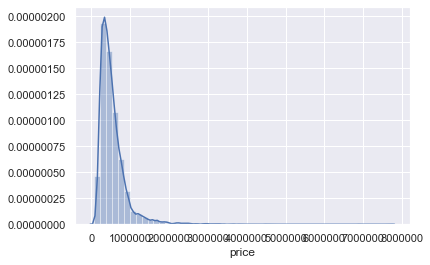

In [31]:
sns.distplot(data['price'])

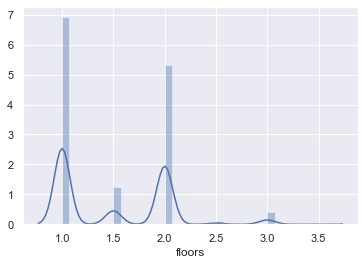

In [32]:
sns.distplot(data['floors'])

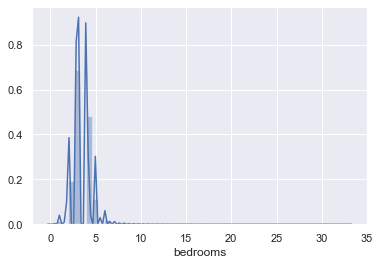

In [33]:

sns.distplot(data['bedrooms'])

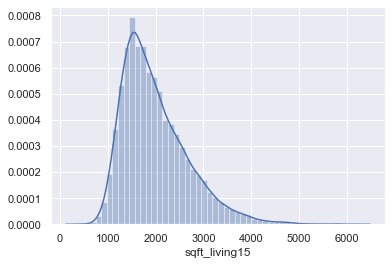

In [34]:
sns.distplot(data['sqft_living15'])

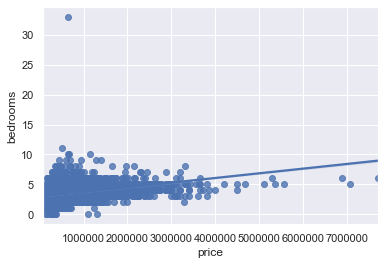

In [36]:
sns.regplot(x='price', y= 'bedrooms' ,data=data)

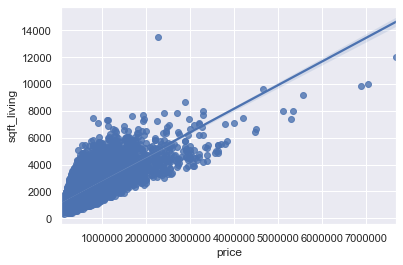

In [38]:
sns.regplot(x='price', y= 'sqft_living' ,data=data)

In [40]:
#choose the features and the target,in features,id and data were dropped while the price is choose as the target
X=data.drop(['price','id','date'],axis=1)
y=data['price']
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [42]:
#split the data into train and test,33% of the data represent the test data while 67% represent the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

In [44]:
#apply the algorithm ,which is linear regression, and we choose the score to evaluate the algorithm
from sklearn.linear_model import LinearRegression
LinearRegressionModel = LinearRegression(fit_intercept=bool, normalize=False,copy_X=True,n_jobs=1)
LinearRegressionModel.fit(X_train, y_train)
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train)*100,"%")
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test)*100,"%")
y_pred = LinearRegressionModel.predict(X_test)

Linear Regression Train Score is :  70.26008959815655 %
Linear Regression Test Score is :  69.3340039939012 %
